In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from utils import gnmax_expost_mvn, gnmax_exante_mvn
N=1000
# digits of precision
dps = 128
delta=1e-5
Delta=1/N

dimensions = np.logspace(4,10, 8, dtype=int, base=2)
sigmas = np.linspace(0.1, 0.5, 5)
exposts_by_dim = [[gnmax_expost_mvn(d=d, sigma=s, GS=Delta, a=0, b=1, dps=dps) for d in dimensions] for s in sigmas]
exantes_by_dim = [[gnmax_exante_mvn(d=d, sigma=s, GS=Delta, delta=delta) for d in dimensions] for s in sigmas]

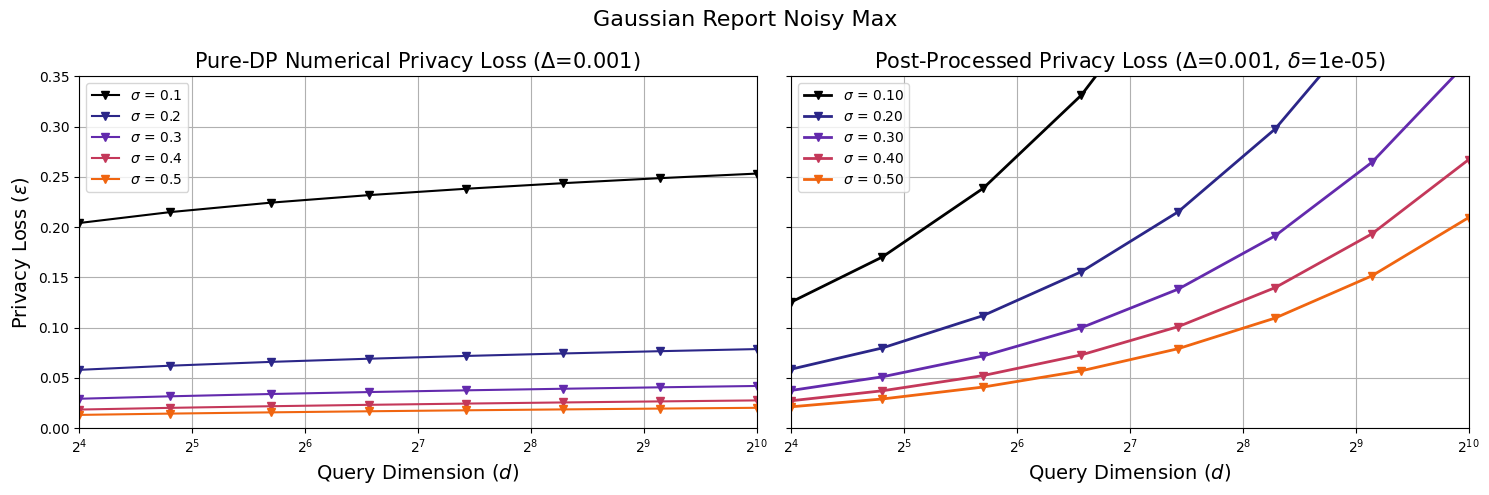

In [13]:
p = plt.colormaps.get_cmap('CMRmap')
norm = mpl.colors.Normalize(vmin=0.1, vmax=0.8)
colormap = lambda idx: p(norm(idx))

fig, axs = plt.subplots(1,2, figsize=(15, 5), sharey=True)
ax = axs[0]

for idx, s in enumerate(sigmas):
    ax.plot(dimensions, exposts_by_dim[idx], label=f'$\\sigma$ = {s:.1f}', color=colormap(s), linewidth=1.5, marker='v')
    
ax.set_title(f'Pure-DP Numerical Privacy Loss ($\\Delta$={Delta})', fontsize=15)
ax.set_xscale('log', base=2)
ax.legend()
ax.set_xlabel('Query Dimension ($d$)', fontsize=14)
ax.set_ylabel('Privacy Loss ($\\epsilon$)', fontsize=14)
ax.grid()
ax.set_xlim(dimensions[0], dimensions[-1])

ax = axs[1]
ax.set_title(f'Post-Processed Privacy Loss ($\\Delta$={Delta}, $\\delta$={delta:.0e})', fontsize=15)

for idx, s in enumerate(sigmas):
    ax.plot(dimensions, exantes_by_dim[idx], linestyle='-', marker='v', label=f'$\\sigma$ = {s:.2f}', linewidth=2, color=colormap(s),)
ax.legend()
ax.set_xscale('log', base=2)

ax.set_xlim(dimensions[0], dimensions[-1])
ax.set_ylim(0.,0.35)

ax.set_xlabel('Query Dimension ($d$)', fontsize=14)

ax.grid()
fig.suptitle('Gaussian Report Noisy Max', fontsize=16)
fig.tight_layout()